In [1]:
file = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
import pandas as pd
df = pd.read_csv(file,header=None)
df.head(10)        

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


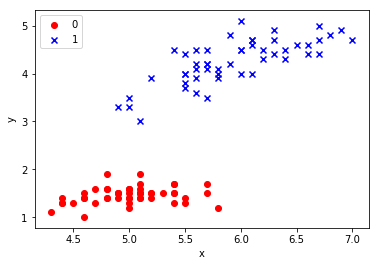

In [3]:
import matplotlib.pyplot as plt
import numpy as np
y = df.loc[0:100,4].values
y = np.where(y == 'Iris-setosa',-1,1)
X = df.loc[0:100,[0,2]].values
v=df.loc[0:100,[0,2,4]].values
v[v =='Iris-setosa']=0
v[v =='Iris-versicolor']=1
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='0')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

In [65]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta = 0.1, n_iter=10):
        self.eta = eta;
        self.n_iter = n_iter;
        pass
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1]);
        self.errors_ = [];
        self.update_ = [];
        for _ in range(self.n_iter) :
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.update_.append(target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update;
                #errors += int(update != 0.0)
                errors += update
                self.errors_.append(errors)
                pass
            pass
        pass

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
        pass

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0 , 1, -1)
        pass
    pass

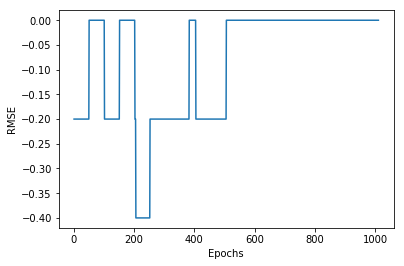

In [66]:
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.show()

In [67]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(x,y,classifier,resolution=0.02):
    markers=('s','x','o','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    plt.scatter(X[0:50,0],X[0:50,1],color='red',marker='o',label='0')         
    plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='1')

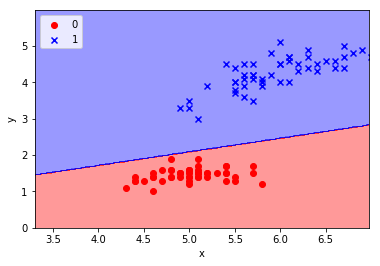

In [68]:
plot_decision_regions(X,y,ppn,resolution=0.02)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()